<a href="https://colab.research.google.com/github/ashivashankars/CMPE255_Assignments/blob/main/tutorials/Tutorial%20-%20Association_Rules_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/1

In [2]:
# STEP 1 — confirm your Python version (should be 3.12)
import sys
print(sys.version)

# STEP 2 — upgrade pip and dependencies
!pip install -U pip setuptools wheel scikit-learn>=1.4

# STEP 3 — install PyCaret directly from GitHub (latest main/master branch supports 3.12)
!pip install -U git+https://github.com/pycaret/pycaret.git@master

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.7.2 which is incompatible.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.5 which is incompatible.
  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-xf6z0h5j
  Running command git clone --filter=blob:none --quiet https://github

In [8]:
from pycaret.datasets import get_data
data = get_data('france')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [4]:
data.shape

(8557, 8)

In [6]:
!pip install mlxtend

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
arule = setup(data = data,
                    transaction_id = 'InvoiceNo',
                    item_id = 'Description')

# Task
Generate association rules from the `data` DataFrame using `mlxtend`, with 'InvoiceNo' as the transaction ID and 'Description' as the item ID.

## Data preparation

### Subtask:
Transform the `data` DataFrame into a one-hot encoded format suitable for `mlxtend`.


**Reasoning**:
Filter the DataFrame, group by InvoiceNo and Description, count occurrences, unstack, fill NaNs with 0, and apply a one-hot encoding function.



In [10]:
basket = data[data['Country'] == 'France'].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)

## Generate frequent itemsets

### Subtask:
Use the `apriori` function from `mlxtend.frequent_patterns` to find frequent itemsets in the one-hot encoded data.


**Reasoning**:
Use the apriori function to find frequent itemsets in the one-hot encoded data and store the result in a variable named frequent_itemsets.



In [11]:
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)
display(frequent_itemsets.head())

,support,itemsets
0,0.060738,(4 TRADITIONAL SPINNING TOPS)
1,0.082430,(ALARM CLOCK BAKELIKE GREEN)
2,0.086768,(ALARM CLOCK BAKELIKE PINK)
3,0.080260,(ALARM CLOCK BAKELIKE RED )
4,0.058568,(ASSORTED COLOUR MINI CASES)


5. **Finish task**: Summarize the steps taken and present the results.

## Generate Association Rules

### Subtask:
Use the `association_rules` function from `mlxtend.frequent_patterns` to generate association rules from the frequent itemsets.

**Reasoning**:
Use the association_rules function with the frequent itemsets and a metric (e.g., 'lift') to find interesting associations between items.

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
display(rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.082430,0.086768,0.062907,0.763158,8.795395,1.0,0.055754,3.855869,0.965925,0.591837,0.740655,0.744079
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.086768,0.082430,0.062907,0.725000,8.795395,1.0,0.055754,3.336620,0.970514,0.591837,0.700296,0.744079
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.082430,0.080260,0.067245,0.815789,10.164296,1.0,0.060629,4.992873,0.982613,0.704545,0.799714,0.826814
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.080260,0.082430,0.067245,0.837838,10.164296,1.0,0.060629,5.658351,0.980295,0.704545,0.823270,0.826814
4,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.082430,0.650759,0.071584,0.868421,1.334474,1.0,0.017942,2.654230,0.273157,0.108197,0.623243,0.489211


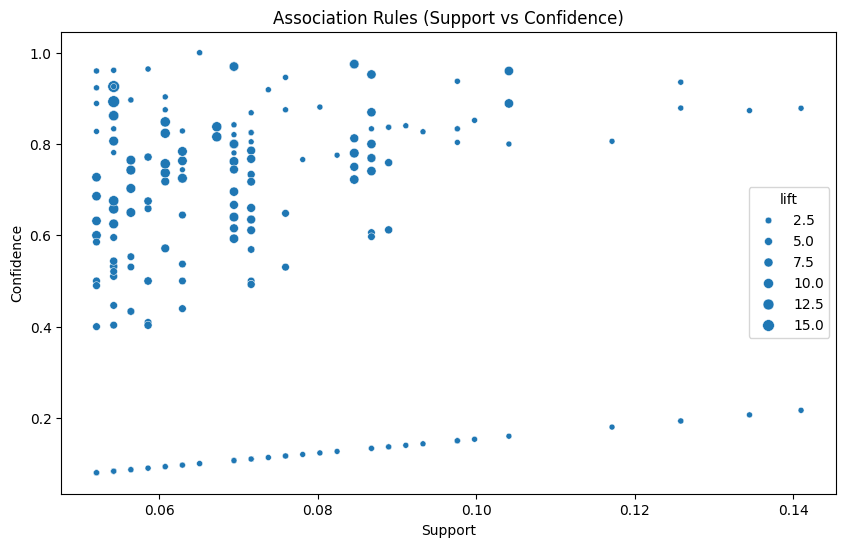

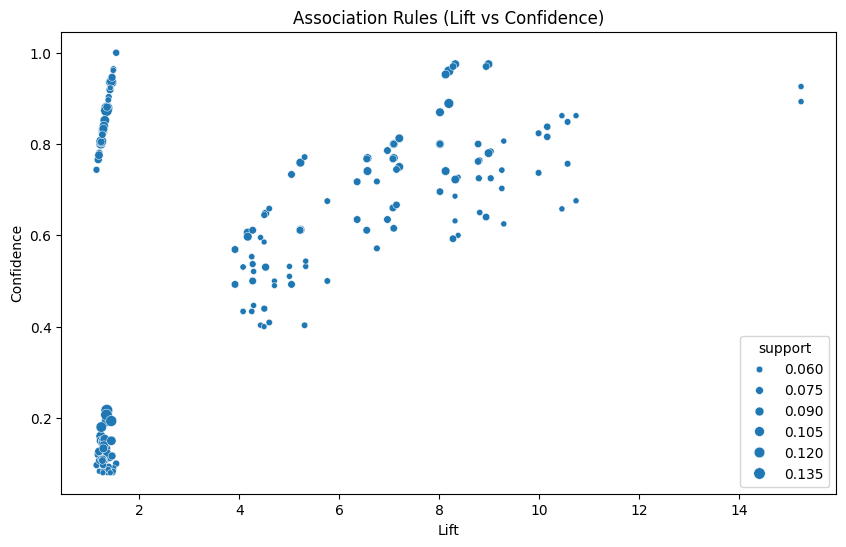

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules (Support vs Confidence)")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="lift", y="confidence", size="support", data=rules)
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.title("Association Rules (Lift vs Confidence)")
plt.show()

In [16]:
# Filter rules by lift greater than 5
filtered_rules = rules[rules['lift'] > 5]
display(filtered_rules.head())

# You can also filter by other metrics, for example:
# filtered_rules_confidence = rules[rules['confidence'] > 0.8]
# display(filtered_rules_confidence.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.082430,0.086768,0.062907,0.763158,8.795395,1.0,0.055754,3.855869,0.965925,0.591837,0.740655,0.744079
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.086768,0.082430,0.062907,0.725000,8.795395,1.0,0.055754,3.336620,0.970514,0.591837,0.700296,0.744079
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.082430,0.080260,0.067245,0.815789,10.164296,1.0,0.060629,4.992873,0.982613,0.704545,0.799714,0.826814
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.080260,0.082430,0.067245,0.837838,10.164296,1.0,0.060629,5.658351,0.980295,0.704545,0.823270,0.826814
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.080260,0.086768,0.062907,0.783784,9.033108,1.0,0.055943,4.223698,0.966900,0.604167,0.763241,0.754392


## Using Association Rules for Recommendations

Association rules can be used to suggest items to users based on their past purchases. If a user has bought an item that is an antecedent in a rule, the consequent of that rule can be recommended.

In [17]:
def recommend_items(item, rules_df):
    """
    Recommends items based on the association rules.

    Args:
        item (str): The item that the user has purchased.
        rules_df (pd.DataFrame): The DataFrame containing the association rules.

    Returns:
        list: A list of recommended items.
    """
    recommended_items = []
    for index, row in rules_df.iterrows():
        # Check if the purchased item is in the antecedent of the rule
        if item in row['antecedents']:
            # Add the consequent(s) to the recommended items list
            for consequent_item in row['consequents']:
                recommended_items.append(consequent_item)

    # Remove duplicates and the original item from the recommendations
    recommended_items = list(set(recommended_items) - set([item]))

    return recommended_items

# Example usage: Get recommendations for 'ALARM CLOCK BAKELIKE GREEN'
recommendations = recommend_items('ALARM CLOCK BAKELIKE GREEN', rules)
print(f"Recommendations for 'ALARM CLOCK BAKELIKE GREEN': {recommendations}")

# You can also use the filtered rules for recommendations
# recommendations_filtered = recommend_items('ALARM CLOCK BAKELIKE GREEN', filtered_rules)
# print(f"Recommendations (filtered rules) for 'ALARM CLOCK BAKELIKE GREEN': {recommendations_filtered}")

Recommendations for 'ALARM CLOCK BAKELIKE GREEN': ['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE PINK', 'POSTAGE']
